# Estimating Binomial Distribution Using Normal and Poisson Distributions

As discussed in the lecture, under specific conditions, the binomial distribution converges to Poisson and normal distributions as limits. Therefore, for calculating the binomial distribution's probability in large-scale problems, we can use Poisson and normal approximations. In this section, we aim to carefully examine the validity and conditions of each of these approximations through a real-world example.

**Example**: According to the Road Accident Statistics Report from the Research Institute of the Iranian Statistics Center, on average, 235 accidents occur daily in the city of Tehran. Studies have shown that the death of an individual involved in an accident follows a Bernoulli distribution with a probability of 0.008. According to the discussion on the relationship between the binomial and Bernoulli distributions, we know that the number of daily deaths due to accidents in Tehran can be defined as a binomial random variable as follows:

$$ X \sim Bin(235, 0.008) $$

In this formula, $X$ represents the number of daily deaths of Tehran citizens due to accidents.

As mentioned earlier, given the low probability of death and the high number of daily accidents in Tehran, the random variable $X$ can be approximated using a Poisson distribution:

$$ \hat{X}_1 \sim Poi(\mu); \,\,\, \mu = 235 \times 0.008 = 1.88 $$

According to the lesson slides, the normal approximation is suitable for probabilities close to 0.5, while the Poisson approximation is more appropriate for probabilities close to 0. Therefore, we expect the Poisson approximation to perform better in this case.

In the following, we aim to validate the aforementioned claims using simulations of the distributions. First, we will generate histograms of the data produced by the `rbinom` function (which represents the samples generated from the random variable $X$). Then, using the default functions in R, we will plot the distributions, and finally, we will compare the performance of each approximation through qualitative analysis. 

Considering the number of daily accidents in Tehran ($235$) and the probability of death in each accident (0.008), it makes sense to plot the distribution around the range $235 \times 0.008 = 1.38$ since, outside this range, the probability will be almost zero due to the nature of the distributions.

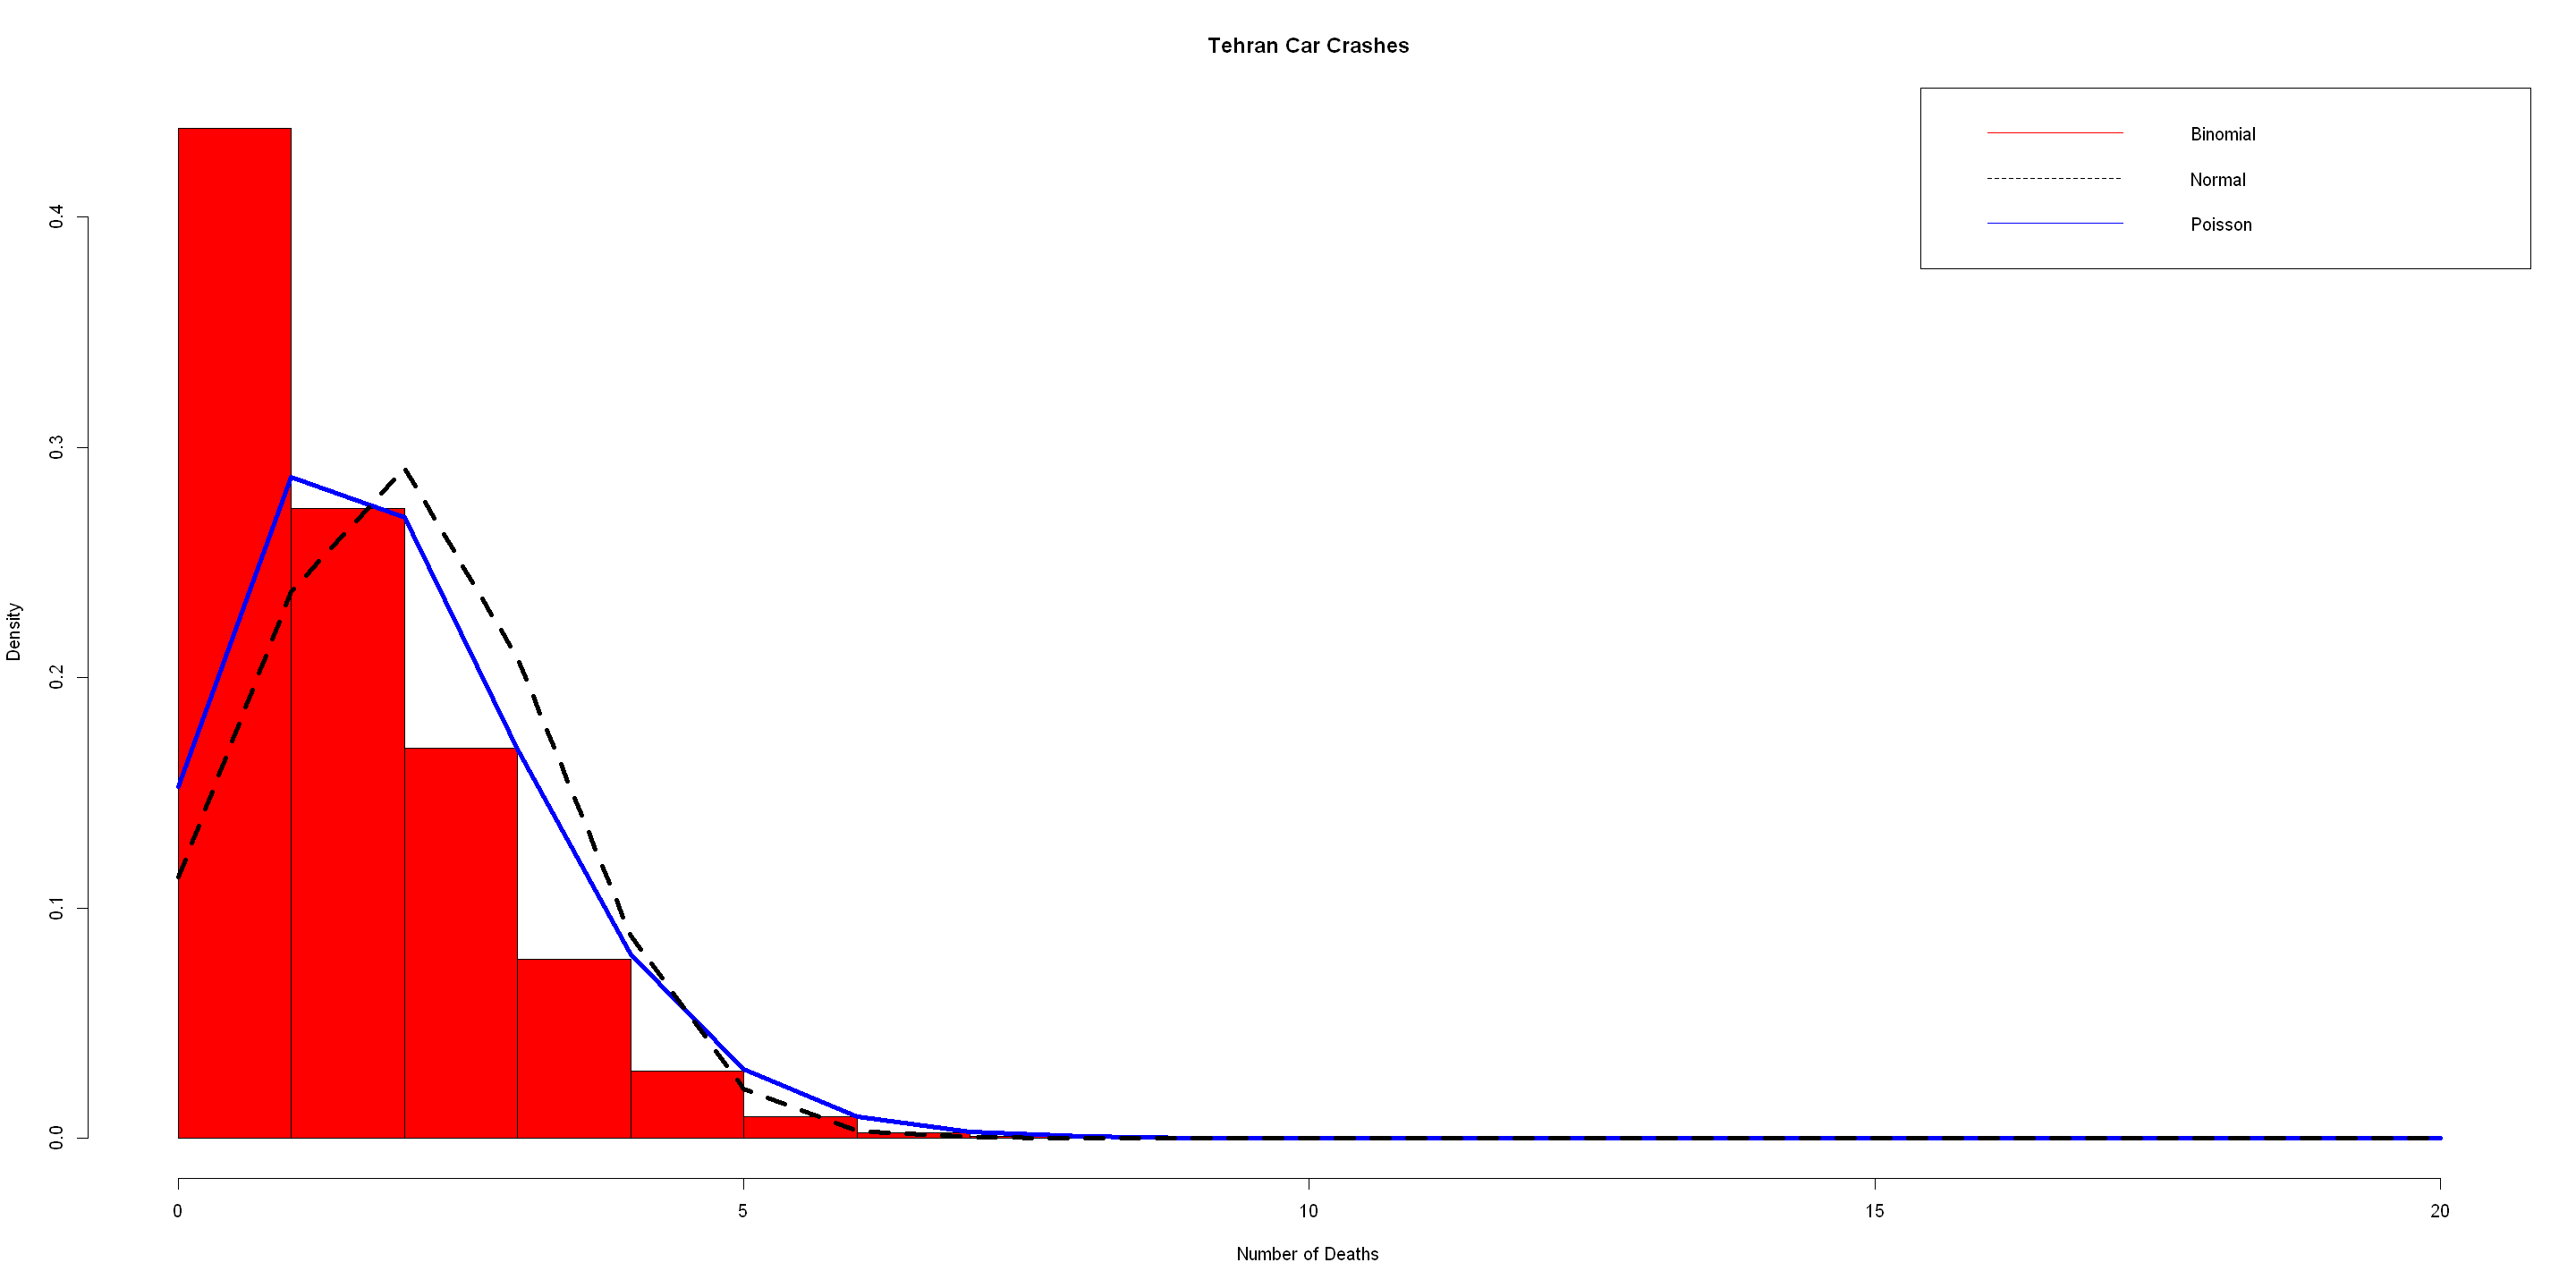

In [2]:
t <- seq(0,20,by = 1)

samples <- rbinom(100000,235,0.008)
x1 <- dpois(t,lambda = 1.88)
x2 <- dnorm(t, mean = 1.88, sd = 1.366)


options(repr.plot.width=24, repr.plot.height=12)
par(mfrow=c(1,1))

hist(samples, breaks = seq(0, 20, by = 1), freq = FALSE,
     xlab = "Number of Deaths", main = "Tehran Car Crashes", col = "red")
lines(t, x1,col = 'blue', lty=1, lwd = 4)
lines(t, x2,col = 'black', lty=2, lwd = 4)

legend("topright", legend = c("Binomial", "Normal", "Poisson"),
       col = c("red", "black", 'blue'), lty = 1:2, cex = 1)

Now, in this section, we will examine another example to investigate the importance of the normal approximation.

**Example**: According to the Iranian Statistics Center, the probability of a Tehran citizen being injured in a city accident follows a Bernoulli distribution with $p = 0.45$, and on average, 7072 accidents occur monthly in Tehran. If we consider the number of injured individuals due to city accidents in Tehran as a binomial random variable $Y$, we have:

$$ Y \sim Bin(7072, 0.45) $$

Similar to before, we know the Poisson and normal approximations of the random variable $Y$ are as follows:

$$ \hat{Y}_1 \sim Poi(3182.59) $$

$$ \hat{Y}_2 \sim \mathcal{N}(3182.59, 41.84) $$

According to the lesson slides, for binomial distributions, the normal approximation is suitable for probabilities close to $0.5$, while the Poisson approximation is valid for probabilities close to $0$. Therefore, we expect the normal approximation to perform better in this case.

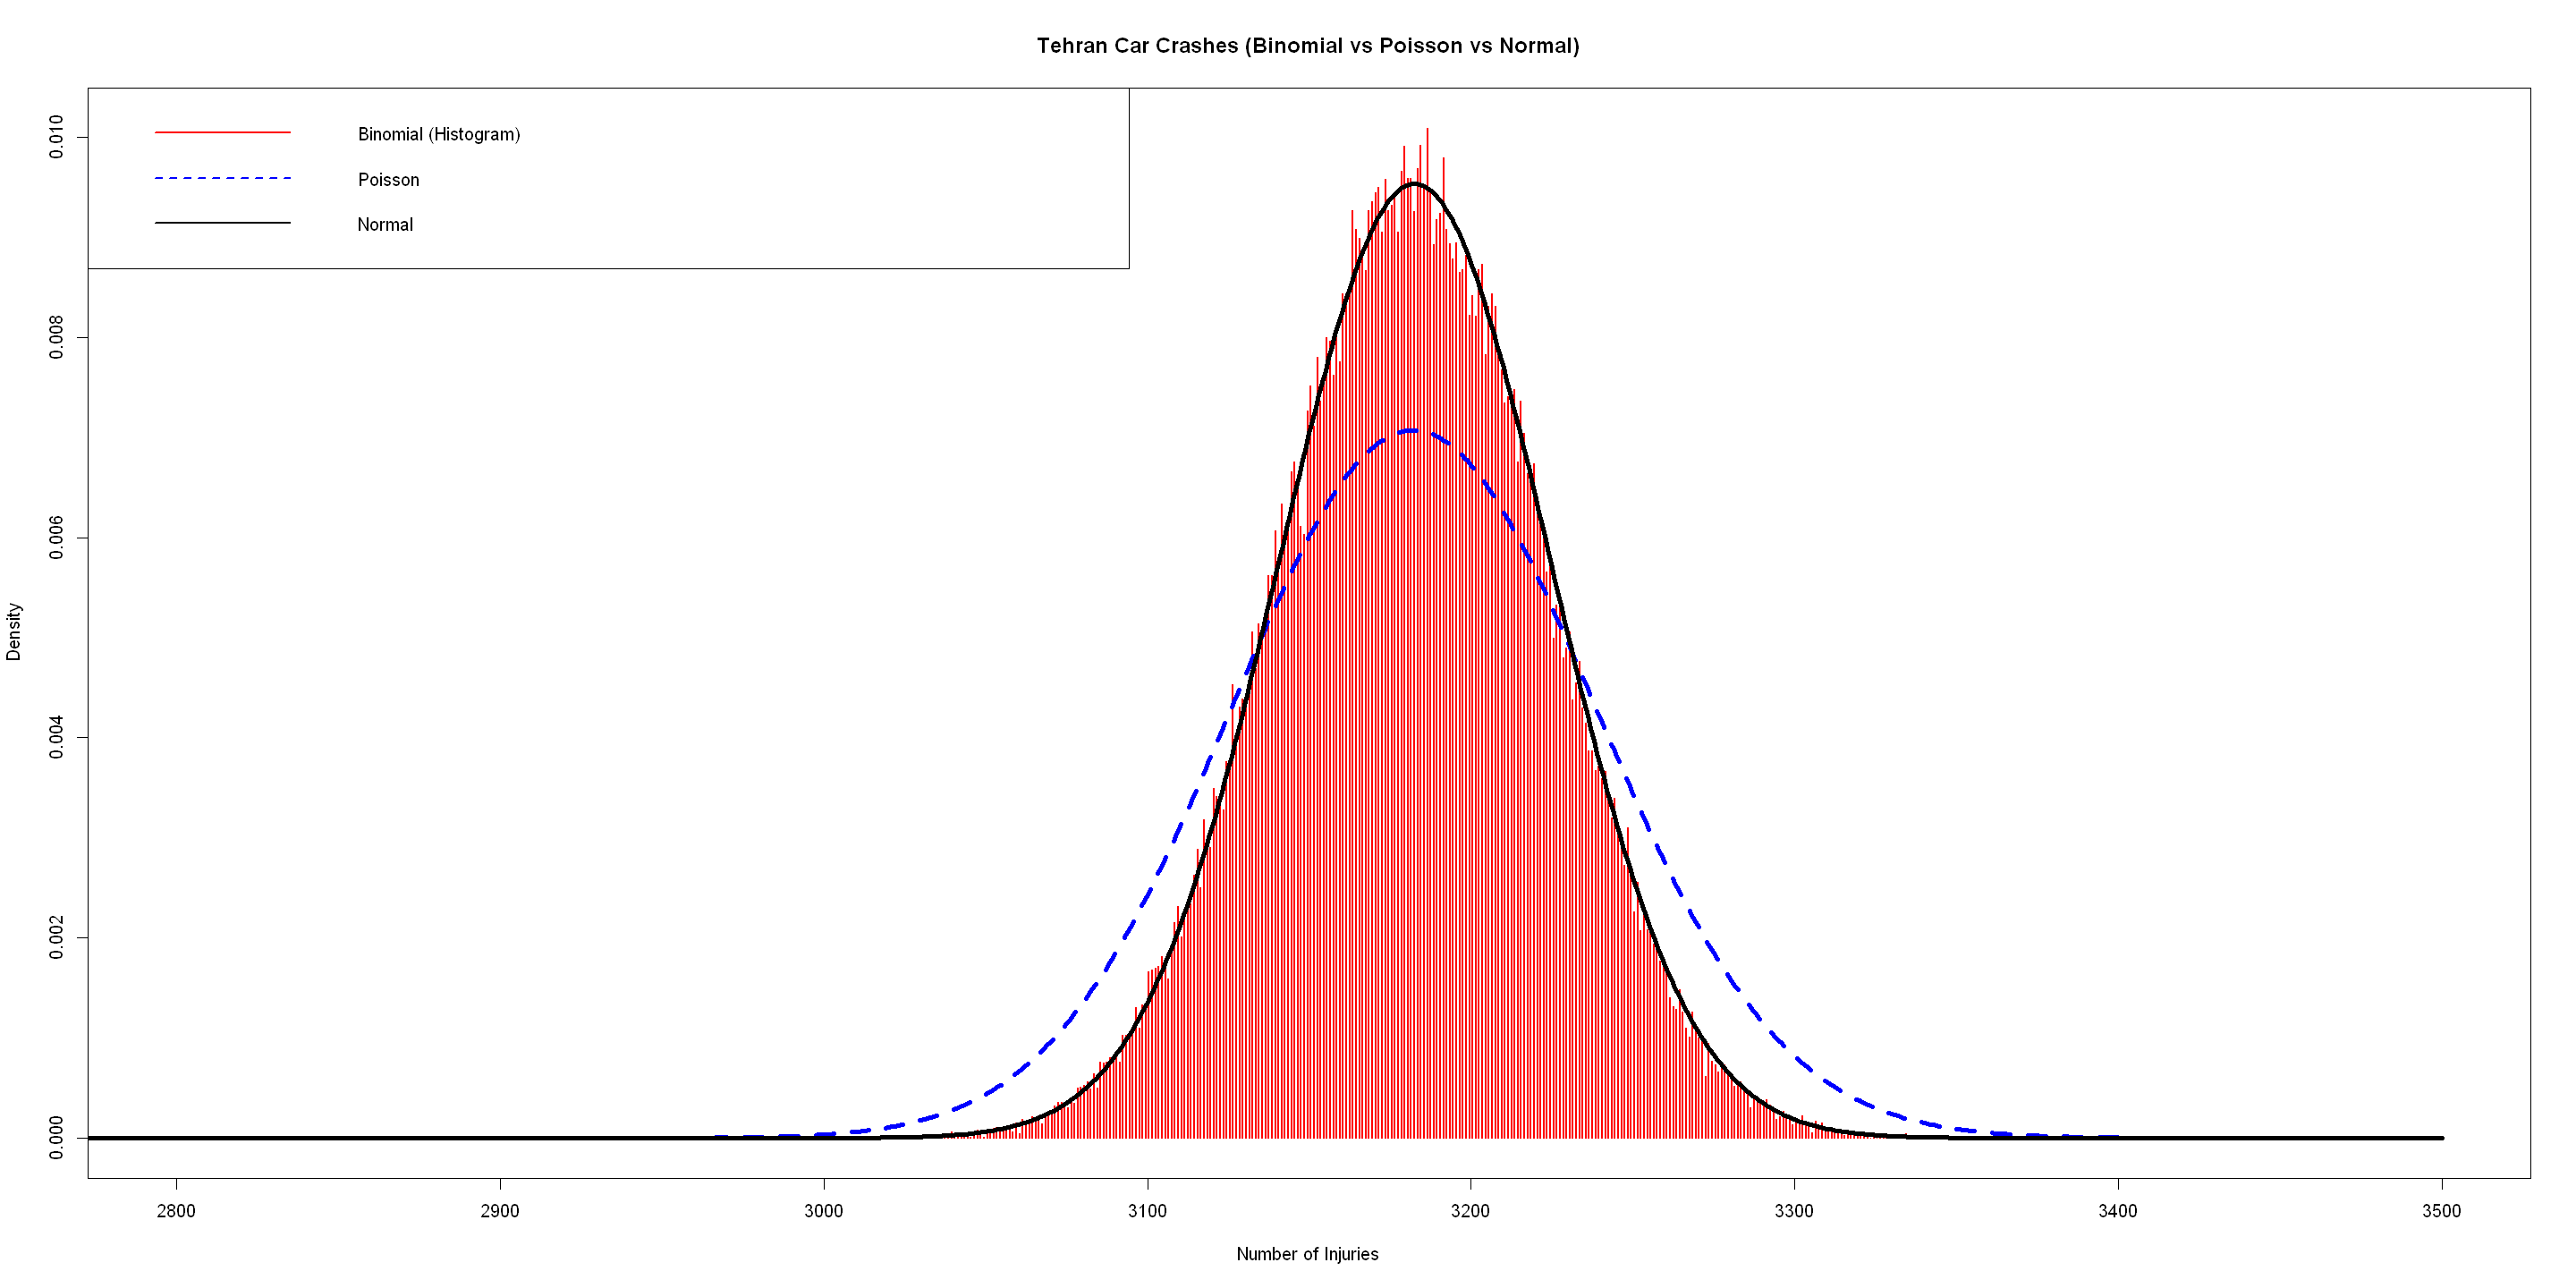

In [5]:
t <- seq(2500, 3500, by = 1)

samples <- rbinom(100000, 7072, 0.45)

y <- hist(samples, breaks = seq(2800, 3500, 1), plot = FALSE)
y$density <- y$counts / sum(y$counts)

y1 <- dpois(t, lambda = 3182.59)
y2 <- dnorm(t, mean = 3182.59, sd = sqrt(7072 * 0.45 * (1 - 0.45)))

options(repr.plot.width = 24, repr.plot.height = 12)
par(mfrow = c(1, 1))

plot(y$mids, y$density, type = "h", col = "red", lwd = 2,
     xlab = "Number of Injuries", ylab = "Density",
     main = "Tehran Car Crashes (Binomial vs Poisson vs Normal)", ylim = c(0, max(y$density, y1, y2)))

lines(t, y1, col = 'blue', lty = 2, lwd = 4)
lines(t, y2, col = 'black', lty = 1, lwd = 4)

legend("topleft", legend = c("Binomial (Histogram)", "Poisson", "Normal"),
       col = c("red", "blue", "black"), lty = c(1, 2, 1), lwd = 2, cex = 1)